In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from functions import get_DAX

In [6]:
hist = get_DAX.get()

In [7]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ret1,ret2,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5
Date,,,,,,,,,,,,,,,,,
1988-01-08 00:00:00+01:00,1026.689941,1026.689941,1026.689941,1026.689941,0,0.0,0.0,1.197370,2.034796,3.024763,7.082493,2.116340,1014.469971,1006.010010,996.099976,956.489990,1005.190002
1988-01-11 00:00:00+01:00,987.520020,987.520020,987.520020,987.520020,0,0.0,0.0,-3.889849,-2.692479,-1.855053,-0.865086,3.192645,1026.689941,1014.469971,1006.010010,996.099976,956.489990
1988-01-12 00:00:00+01:00,986.890015,986.890015,986.890015,986.890015,0,0.0,0.0,-0.063817,-3.953666,-2.756296,-1.918870,-0.928903,987.520020,1026.689941,1014.469971,1006.010010,996.099976
1988-01-13 00:00:00+01:00,965.770020,965.770020,965.770020,965.770020,0,0.0,0.0,-2.163287,-2.227104,-6.116953,-4.919583,-4.082157,986.890015,987.520020,1026.689941,1014.469971,1006.010010
1988-01-14 00:00:00+01:00,974.460022,974.460022,974.460022,974.460022,0,0.0,0.0,0.895776,-1.267511,-1.331328,-5.221176,-4.023806,965.770020,986.890015,987.520020,1026.689941,1014.469971


In [8]:

tau = [.025, .25, .5, .75, .975]

In [9]:
pred_quantile_regression = np.zeros((5, 5))

In [10]:
# Perform quantile regression for each horizon and quantile
for i in range(5):
    ret_str = f"ret{i+1}"
    y = hist[ret_str]  # Dependent variable
    X = hist[[f'lag_ret{j}' for j in range(1, 6)]]  # Independent variables
    X = add_constant(X)  # Adds a constant term to the predictors

    for j, q in enumerate(tau):
        # Fit the model for the q-th quantile
        mod = smf.quantreg(f'{ret_str} ~ lag_ret1 + lag_ret2 + lag_ret3 + lag_ret4 + lag_ret5', hist)
        res = mod.fit(q=q)
        
        # Predict the quantile for the last observation
        pred_quantile_regression[i, j] = res.predict(X.iloc[-1:])[0]

/var/folders/y3/h1kjcg6j0wj3crmk4m1ff0380000gn/T/ipykernel_3971/204857745.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i, j] = res.predict(X.iloc[-1:])[0]
/var/folders/y3/h1kjcg6j0wj3crmk4m1ff0380000gn/T/ipykernel_3971/204857745.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i, j] = res.predict(X.iloc[-1:])[0]
/var/folders/y3/h1kjcg6j0wj3crmk4m1ff0380000gn/T/ipykernel_3971/204857745.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

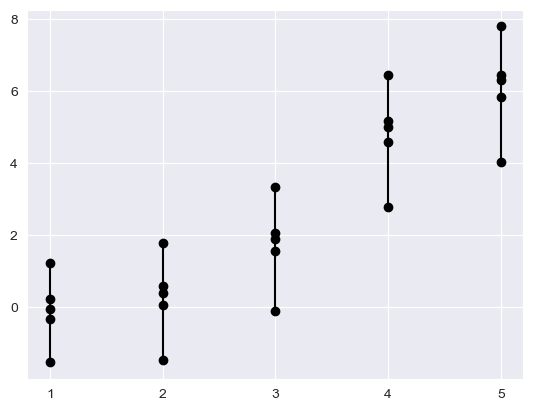

In [11]:
x = np.arange(5)+1
_ = plt.plot(x,pred_quantile_regression, ls="", marker="o", c="black")
_ = plt.xticks(x, x)
_ = plt.plot((x,x),(pred_quantile_regression[:,0], pred_quantile_regression[:,-1]),c='black')

In [12]:
from datetime import datetime, date
date_str = date.today() #.strftime('%Y%m%d')


In [13]:
df_sub = pd.DataFrame({
    "forecast_date": date_str,
    "target": "DAX",
    "horizon": [str(i) + " day" for i in (1, 2, 5, 6, 7)],
    "q0.025": pred_quantile_regression[:, 0],
    "q0.25": pred_quantile_regression[:, 1],
    "q0.5": pred_quantile_regression[:, 2],
    "q0.75": pred_quantile_regression[:, 3],
    "q0.975": pred_quantile_regression[:, 4]
})

In [14]:
df_sub

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2023-11-18,DAX,1 day,-1.527961,-0.310518,-0.054355,0.225279,1.234585
1,2023-11-18,DAX,2 day,-1.456017,0.059355,0.394031,0.603557,1.788186
2,2023-11-18,DAX,5 day,-0.090082,1.554570,1.901802,2.052857,3.329860
3,2023-11-18,DAX,6 day,2.791002,4.576141,5.004386,5.172169,6.452624
4,2023-11-18,DAX,7 day,4.024749,5.838083,6.306226,6.451865,7.788548


In [15]:
#need to change this
PATH = "../forecasts"
date_str = datetime.today().strftime('%Y%m%d')
df_sub.to_csv(PATH+"/"+date_str+"DAX_Quantile_Regression.csv",index=False)